# Use simulations to identify the appropriate error rate for library design

* Oligos using IDT's hand-mixing option can have customized nucleotide ratios
    * The number of errors per oligo is a critical experimental parameter for appropriate library design
* Use simulations to identify optimal error rate
    * High likelihood of seeing seqs with few errors, while maximizing the number of total seqs

In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(seed=1)

In [3]:
def generate_sequence(length, error_rate):
    #pick whether there is a match or mismatch
    alphabet = ['M', 'a', 'b', 'c']
    error_rates = [error_rate, (1-error_rate) / 3, (1-error_rate) / 3, (1-error_rate) / 3]
    
    seq = ''
    
    for i in range(0, length):
        seq += np.random.choice(alphabet, p=error_rates, replace=True)
    #print(mismatch_vector)   
    return(seq)
#generate_sequence(100, 0.8)

In [4]:
def sample_sequences(num_reads, length, error_rate):
    sequences = {}
    for i in range(0, num_reads):
        seq = generate_sequence(length, error_rate)
        if(seq not in sequences.keys()):
            sequences[seq] = 1
        else:
            sequences[seq] +=1
    return sequences

#sample_sequences(100, 5, 0.8)

In [9]:
def plot_distributions(sampled_sequences, num_reads, length, error_rate):
    #xaxis is number of mismatches
    #yaxis is counts    
    mismatches_counts = {}
    for i in range(0, length + 1):
        mismatches_counts[i] = []
    
    for key in sampled_sequences.keys():
        num_mismatches = length - key.count('M')
        mismatches_counts[num_mismatches].append(sampled_sequences[key])
 
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9, 3))
    ax[0].boxplot([mismatches_counts[i] for i in range(1, length+1)], 0, 'rs', 1)
    ax[0].set_xlabel('Number of mismatches')
    ax[0].set_ylabel('Number of seqs per mismatch')
    ax[0].set_title('Num reads = %i\nMismatch rate = %f' % (num_reads, error_rate))
    ax[0].set_yscale('log')
    
    ax[1].plot(np.arange(0, length), [np.sum(mismatches_counts[i]) for i in range(0, length)])
    ax[1].set_xlabel('Number of mismatches')
    ax[1].set_ylabel('Number of reads')
    ax[1].set_title('Num reads = %i\nMismatch rate = %f' % (num_reads, error_rate))
    
    ax[2].plot(np.arange(0, length), [len(mismatches_counts[i]) for i in range(0, length)])
    ax[2].set_xlabel('Number of mismatches')
    ax[2].set_ylabel('Number of unique reads')
    ax[2].set_title('Num reads = %i\nMismatch rate = %f' % (num_reads, error_rate))
    
    plt.tight_layout()
    plt.show()

working on error rate 0.600000


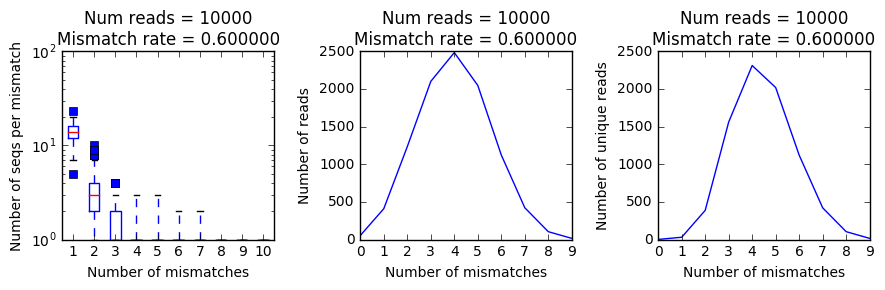

working on error rate 0.650000


/usr/local/lib/python3.5/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


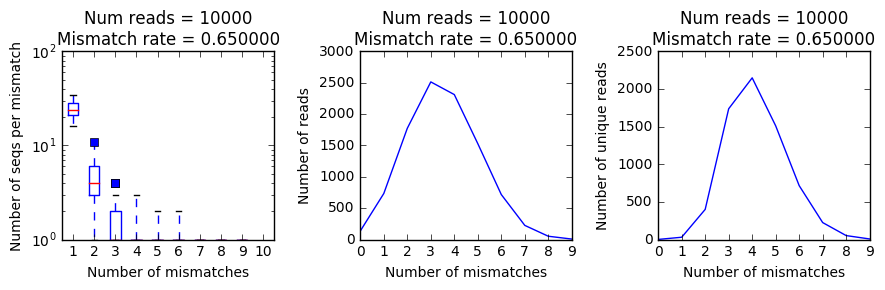

working on error rate 0.700000


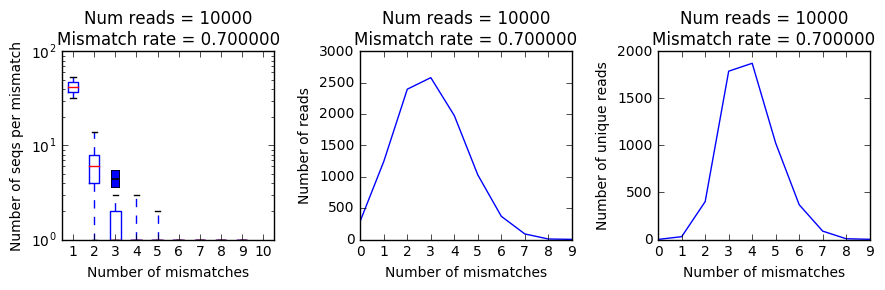

working on error rate 0.750000


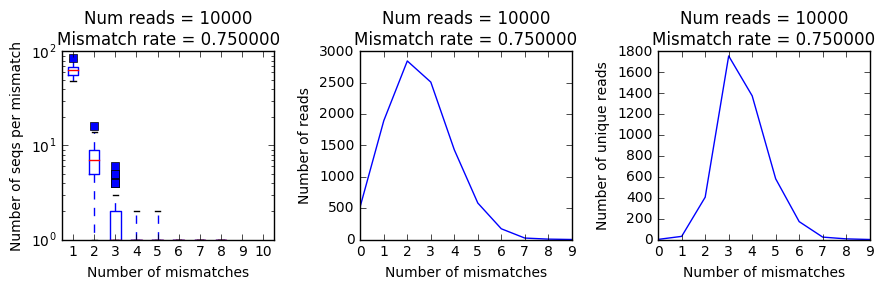

working on error rate 0.800000


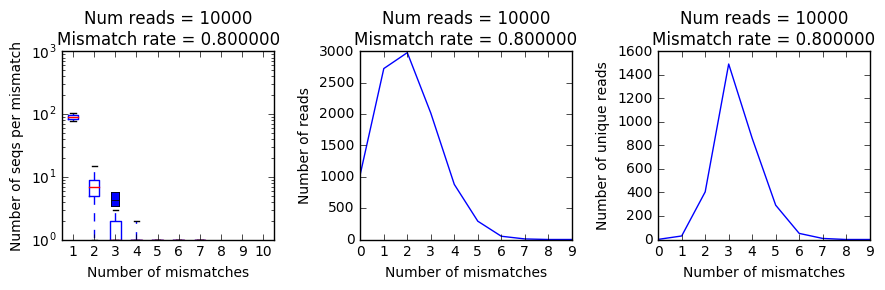

working on error rate 0.850000


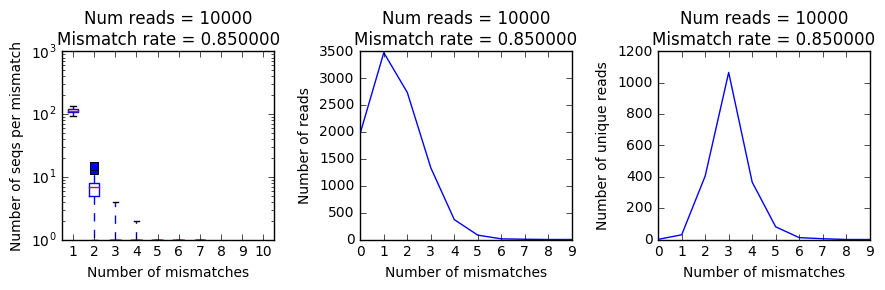

working on error rate 0.900000


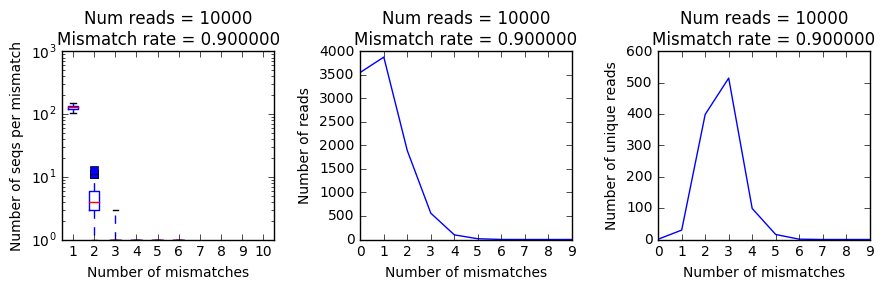

working on error rate 0.950000


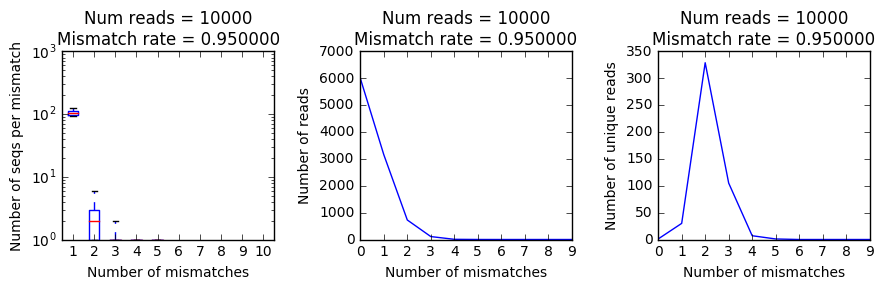

In [10]:
num_reads = 10000
error_rates = np.arange(0.6, 1, 0.05)
length = 10
for error_rate in error_rates:
    print('working on error rate %f' % (error_rate))
    sequences = sample_sequences(num_reads, length, error_rate)
    plot_distributions(sequences, num_reads, length, error_rate)

____

### Use error rate = (1 - 0.75) = 0.25